![Alt text](https://imgur.com/orZWHly.png=80)
source: @allison_horst https://github.com/allisonhorst/penguins

You have been asked to support a team of researchers who have been collecting data about penguins in Antartica! The data is available in csv-Format as `penguins.csv`

**Origin of this data** : Data were collected and made available by Dr. Kristen Gorman and the Palmer Station, Antarctica LTER, a member of the Long Term Ecological Research Network.

**The dataset consists of 5 columns.**

Column | Description
--- | ---
culmen_length_mm | culmen length (mm)
culmen_depth_mm | culmen depth (mm)
flipper_length_mm | flipper length (mm)
body_mass_g | body mass (g)
sex | penguin sex

Unfortunately, they have not been able to record the species of penguin, but they know that there are **at least three** species that are native to the region: **Adelie**, **Chinstrap**, and **Gentoo**.  Your task is to apply your data science skills to help them identify groups in the dataset!

In [45]:
# Import Required Packages
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Loading and examining the dataset
penguins_df = pd.read_csv("penguins.csv")
penguins_df.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,MALE
1,39.5,17.4,186.0,3800.0,FEMALE
2,40.3,18.0,195.0,3250.0,FEMALE
3,36.7,19.3,193.0,3450.0,FEMALE
4,39.3,20.6,190.0,3650.0,MALE


In [46]:
#Data Preprocessing 
df_dummies= pd.get_dummies(penguins_df["sex"], drop_first= True)
df= pd.concat([penguins_df, df_dummies], axis=1)
df= df.drop("sex", axis= 1)
df.head()


,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,MALE
0,39.1,18.7,181.0,3750.0,1
1,39.5,17.4,186.0,3800.0,0
2,40.3,18.0,195.0,3250.0,0
3,36.7,19.3,193.0,3450.0,0
4,39.3,20.6,190.0,3650.0,1


In [47]:
#Standardizing 
scaler = StandardScaler()
scaled_penguins= scaler.fit_transform(df)

print(scaled_penguins)

[[-0.90390586  0.79035987 -1.42534179 -0.56694801  0.99399394]
 [-0.83043377  0.12618674 -1.0685765  -0.50484747 -1.00604235]
 [-0.68348959  0.43272819 -0.42639899 -1.18795343 -1.00604235]
 ...
 [ 1.17168063 -0.74234736  1.50013355  1.91707363  0.99399394]
 [ 0.21654349 -1.20215952  0.78660298  1.23396768 -1.00604235]
 [ 1.07984052 -0.53798639  0.85795603  1.48236985  0.99399394]]


detecting the optimal number of clusters for k-means clustring after performing a KMeans model

In [48]:
#after google global researches there is 6 type of penguins m gonna base the first attempt of clustring by it then redo it and choose the best K 
model = KMeans(n_clusters= 6)

model.fit(scaled_penguins)

labels= model.predict(scaled_penguins)

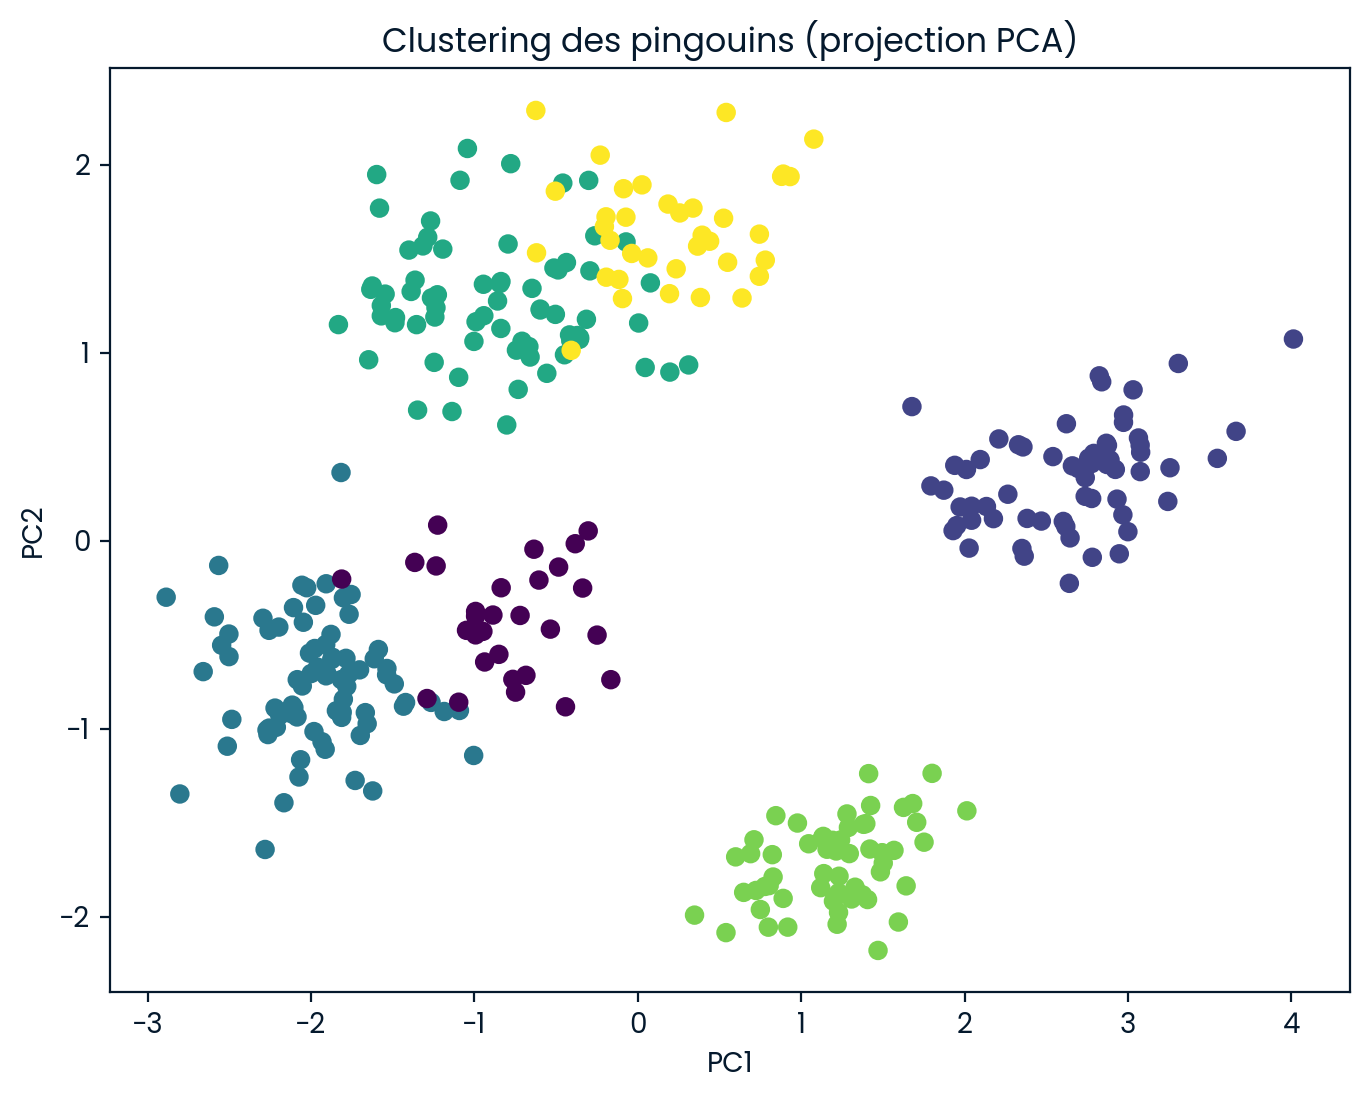

In [49]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_penguins)

plt.figure(figsize=(8,6))
plt.scatter(pca_data[:,0], pca_data[:,1], c=labels)
plt.title("Clustering des pingouins (projection PCA)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

apres avoir le scatter plot je pense que le choix du nombre de cluster est invalide on va changer ca

In [50]:
print(model.inertia_)
#comme on a dit le centredinertie de ce model est tres elevee cest 215,9

215.9510467634977


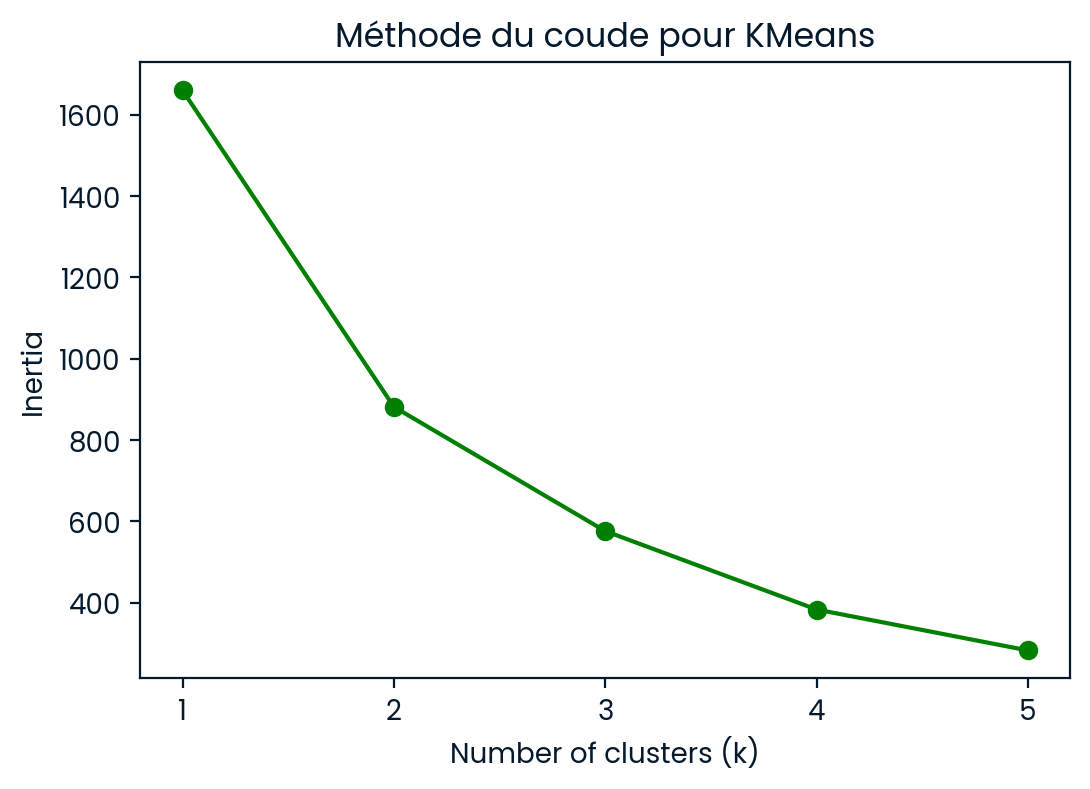

In [51]:
ks = range(1, 6)
inertias = []

for k in ks:
    model = KMeans(n_clusters=k, random_state=42)
    model.fit(scaled_penguins) 
    inertias.append(model.inertia_)

plt.figure(figsize=(6,4))
plt.plot(ks, inertias, 'g-o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.xticks(ks)
plt.title("Méthode du coude pour KMeans")
plt.show()


apres lutilisation du methode de coude je choisit 3 comme nombre de cluster ideal pour Kmeans model

In [52]:
model = KMeans(n_clusters= 3)
model.fit(scaled_penguins)

labels = model.labels_ 

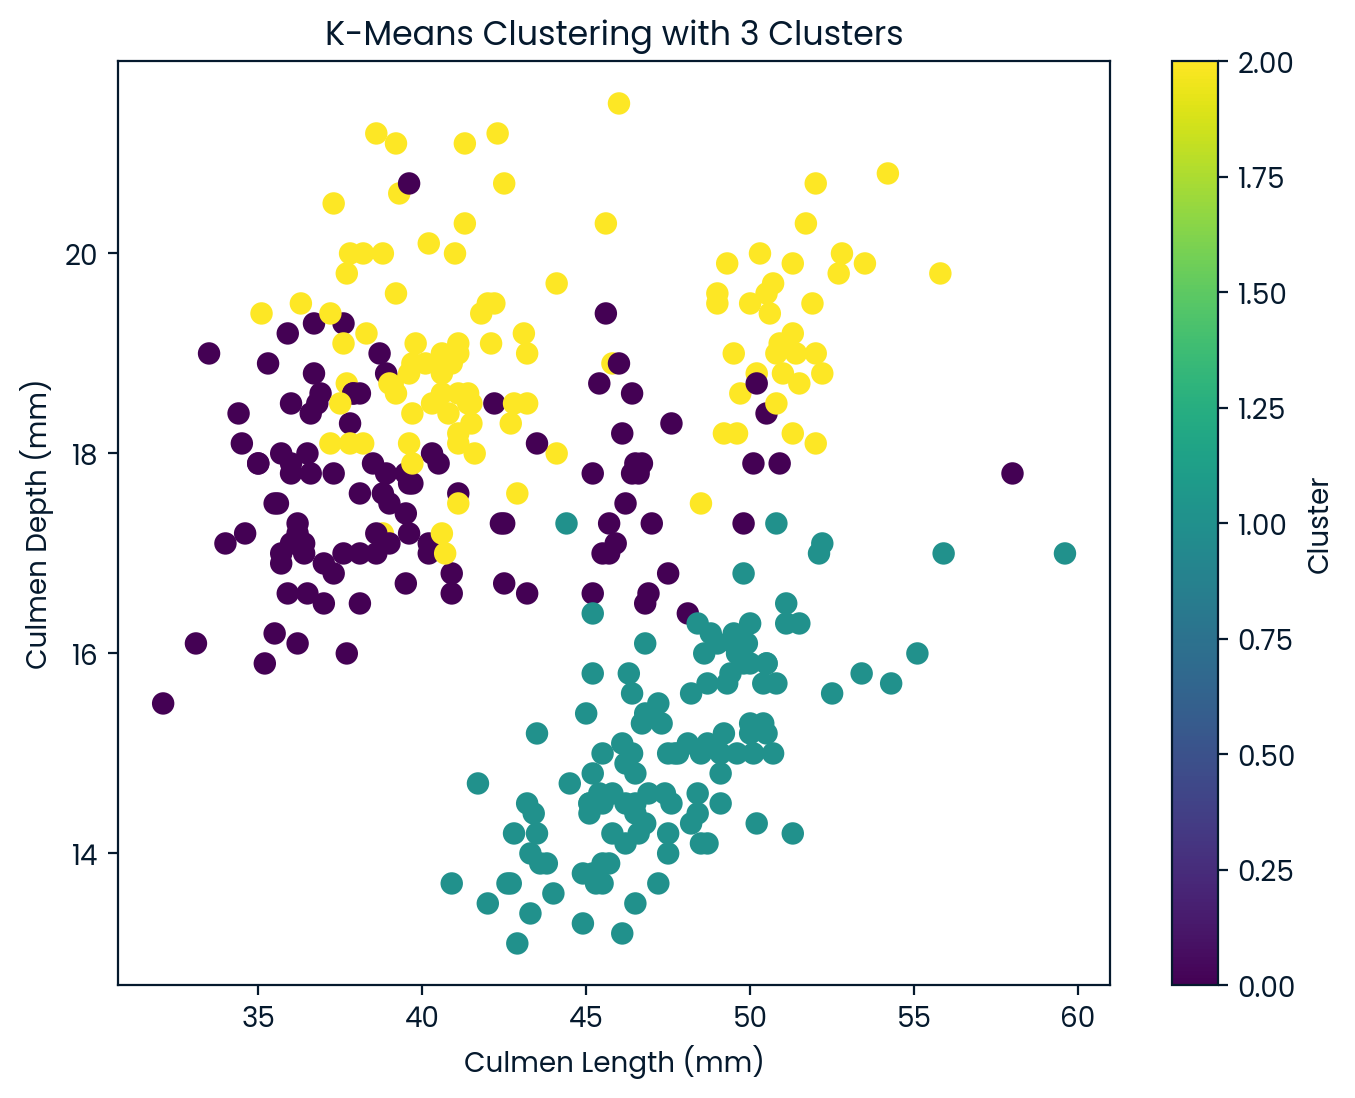

In [53]:
df['cluster']= labels
plt.figure(figsize=(8,6))
plt.scatter(
    df['culmen_length_mm'], 
    df['culmen_depth_mm'], 
    c=df['cluster'], 
    cmap='viridis', 
    s=50
)
plt.xlabel('Culmen Length (mm)')
plt.ylabel('Culmen Depth (mm)')
plt.title(f'K-Means Clustering with {3} Clusters')
plt.colorbar(label='Cluster')
plt.show()

In [54]:
penguins_df['Cluster'] = labels

# 2. Group by cluster and calculate mean for numeric columns only
stat_penguins = penguins_df.groupby('Cluster').mean()

# 3. Optional: reset index for nicer table
stat_penguins = stat_penguins.reset_index()

# 4. Display the table
print(stat_penguins)

   Cluster  culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g
0        0         40.217757        17.611215         189.046729  3419.158879
1        1         47.568067        14.996639         217.235294  5092.436975
2        2         43.878302        19.111321         194.764151  4006.603774
